# Section-A

# Q1



## (a) Horizontal resolution (pixels per line)

width = (16 / 9) × 1125  
width = `2000` pixels

**Answer (a):** `2000` pixels per line

---

## (b) Total number of pixels per frame

pixels per frame = width × height = `2000 × 1125` = `2,250,000` pixels

**Answer (b):** `2,250,000` pixels/frame

---

## (c) Pixel coordinate convention (digital imaging)

- Origin is usually at the **top-left** of the image: coordinate `(0, 0)`.  
- `y` (column) increases to the **right**.  
- `x` (row) increases **downwards**.  
- Pixels typically indexed **0-based**: `y ∈ [0, width-1]`, `x ∈ [0, height-1]`.  
- A pixel is referenced as `(x, y)` where `x` is vertical position and `y` is horizontal position.

**Answer (c):** Top-left origin, x→right, y→down, 0-based indexing.

---

## (d) Bits required to store a single frame

pixels/frame = `2,250,000`  
bits/pixel = `24`

bits/frame = `2,250,000 × 24` = `54,000,000` bits per frame  
bytes/frame = `54,000,000 / 8` = `6,750,000` bytes per frame ≈ `6.75 MB` (MiB ≈ 6.43 MiB)

**Answer (d):** `54,000,000` bits per frame (`6,750,000` bytes/frame)

---

## (e) Storage for entire two-hour HDTV movie (uncompressed)

frames per second = `30`  
total frames = `30 × 7,200` = `216,000` frames

total bits = `54,000,000 × 216,000` = `11,664,000,000,000` bits  
total bytes = `11,664,000,000,000 / 8` = `1,458,000,000,000` bytes

Convert to GB (1 GB = 2**30 bytes):  
total GB = `1,458,000,000,000 / (2**30)` ≈ **`1,357.87 GB`**

**Answer (e):** `~1,357.87 GB` (using 1 GB = 2³⁰ bytes)

---

## (f) Downsampling by factor 2 in both horizontal and vertical directions

- New width = `2000 / 2` = `1000` pixels  
- New height = floor(`1125 / 2`) = `562` lines 
- New pixels/frame = `(2000/2) × (1125/2)` = `1000 × 562` = `562,000` pixels (this is exactly 1/4 of the original `2,250,000`)

bits/frame (downsampled) = `562,000 × 24` = `13,488,000` bits/frame  
total bits (2 hours) = `13,488,000 × 216,000` = `2,913,408,000,000` bits  
total bytes = `2,916,000,000,000 / 8` = `364,176,000,000` bytes  
total GB = `364,500,000,000 / (2**30)` ≈ **`339.16 GB`**

**Answer (f):**
- Storage for 2-hour movie ≈ **`339.16 GB`** (about one quarter of the original, as expected).

---

## (g) Reducing quantization from 24 bits/pixel to 12 bits/pixel

Storage scales linearly with bits/pixel. Reducing from `24` to `12` bits/pixel halves storage.

- Total for 12 bpp = original total GB ÷ 2 = `1,357.87 / 2` ≈ **`678.93 GB`**  
- Storage saved = original − new = `1,357.87 − 678.93` ≈ **`678.93 GB`** (50% reduction)

**Answer (g):** `~678.93 GB` saved for the two-hour movie (new size ≈ `678.93 GB`).

---

## Final Answer
- (a) Width = `2000` pixels  
- (b) Pixels/frame = `2,250,000`  
- (d) Bits/frame = `54,000,000` bits (`6,750,000` bytes)  
- (e) Two-hour movie (24 bpp, uncompressed) ≈ **`1,357.87 GB`**  
- (f) Downsampled (×0.5 in each dim) ≈ **`339.47 GB`** (resolution `1000 × 562.5`, `562,500` px/frame)  
- (g) 12 bpp movie size ≈ **`678.93 GB`**, saving ≈ **`678.93 GB`** (50%)

---

# Q2


# A

(a) Adjusted resolution: (600, 337)


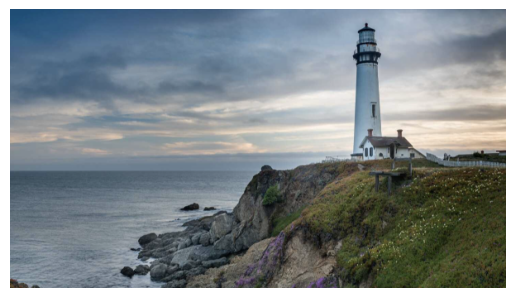

In [4]:
from PIL import Image
import math
import matplotlib.pyplot as plt

def adjusted_resolution(image_path, aspect_ratio="16:9"):
    img = Image.open(image_path)
    orig_width, orig_height = img.size
    
    ratio_w, ratio_h = map(int, aspect_ratio.split(":"))
    target_ratio = ratio_w / ratio_h
    current_ratio = orig_width / orig_height
    
    if current_ratio > target_ratio:
        new_height = orig_height
        new_width = math.floor(new_height * target_ratio)
    else:
        new_width = orig_width
        new_height = math.floor(new_width / target_ratio)
    
    return (new_width, new_height), img

image_file = "/kaggle/input/dip-a1/lighthouse.png"
res, img = adjusted_resolution(image_file, "16:9")
print("(a) Adjusted resolution:", res)

img_resized = img.resize(res)
plt.imshow(img_resized)
plt.axis("off")
plt.show()


# b

In [5]:
def total_pixels(resolution):
    return resolution[0] * resolution[1]

pixels = total_pixels(res)
print("(b) Total pixels:", pixels)


(b) Total pixels: 202200


# Image Processing Functions and Mappings

We are given two functions:

1. **Linear combination with modulo:**  

   f(I1, I2, k1, k2, k3) = ((I1 * k1) + (I2 * k2) + k3) mod 255

2. **Histogram matching:**  

   g(I1, I2) = Histogram matching (source: I1, reference: I2)

---

## Image Mappings

1. **Image (e)**  

   - Function: A  
   - I1 = Image (d)  
   - I2 = Image (b)  
   - Operation: Image (e) = g(I1, I2)

---

2. **Image (f)**  

   - Function: C  
   - I1 = Image (a)  
   - I2 = Image (c)  
   - Operation: Image (f) = f(I1, I2, 0.5, 0.5, 0)

---

3. **Image (g)**  

   - Function: D  
   - I1 = Image (b)  
   - I2 = Image (d)  
   - Operation: Image (g) = f(I1, I2, 0.8, 0.2, 6)

---

4. **Image (h)**  

   - Function: B  
   - I1 = Image (b)  
   - I2 = Image (c)  
   - Operation: Image (h) = g(I1, 255 - I2)


Doing some preprocessing steps for my ease

binary mask shape: (600, 600)
dtype: uint8
unique values in mask: [  0 255]
white pixel count (255): 116075
black pixel count (0): 243925

Sample (top-left 10x10) of binary mask array:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


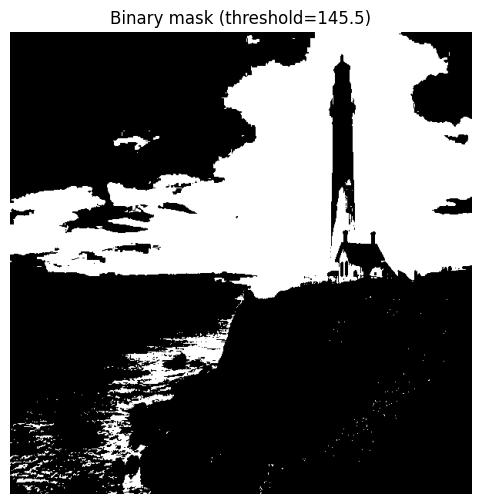

Saved binary mask to: /kaggle/working/binary_mask.png


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

input_path = "/kaggle/input/dip-a1/lighthouse.png"
output_path = "/kaggle/working/binary_mask.png"
threshold = 145.5

img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"Could not load image at {input_path}")

binary_mask = (img > threshold).astype(np.uint8) * 255

print("binary mask shape:", binary_mask.shape)
print("dtype:", binary_mask.dtype)
print("unique values in mask:", np.unique(binary_mask))
print("white pixel count (255):", int(np.count_nonzero(binary_mask == 255)))
print("black pixel count (0):", int(np.count_nonzero(binary_mask == 0)))
print("\nSample (top-left 10x10) of binary mask array:")
print(binary_mask[:10, :10])

plt.figure(figsize=(6,6))
plt.title(f"Binary mask (threshold={threshold})")
plt.imshow(binary_mask, cmap='gray')
plt.axis('off')
plt.show()

cv2.imwrite(output_path, binary_mask)
print(f"Saved binary mask to: {output_path}")


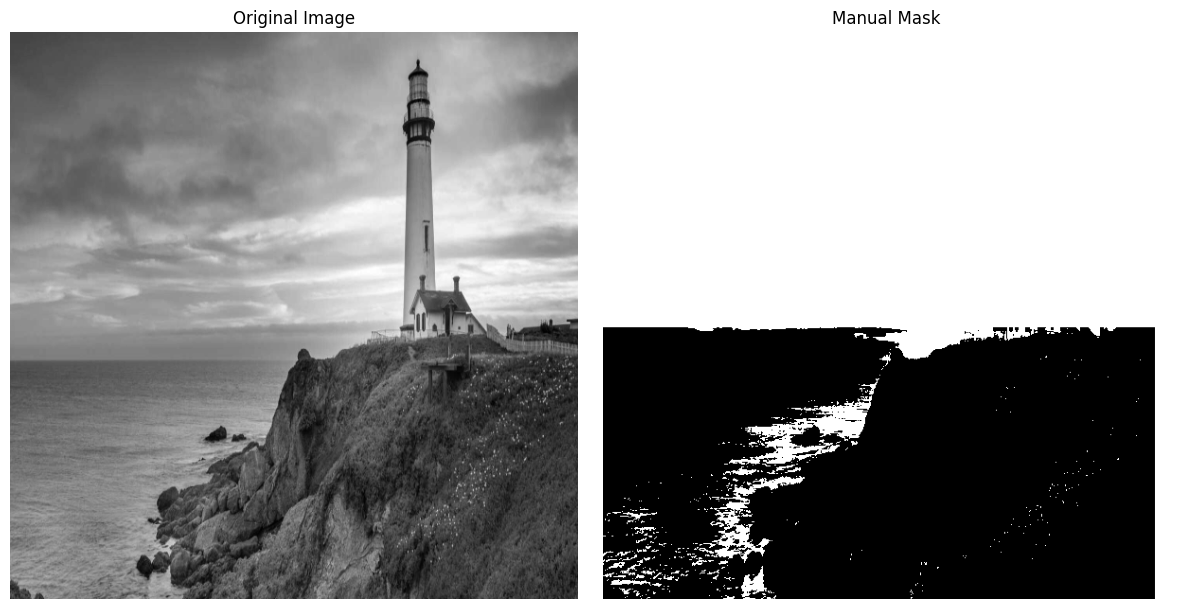


Total black pixels inside polygon: 8411


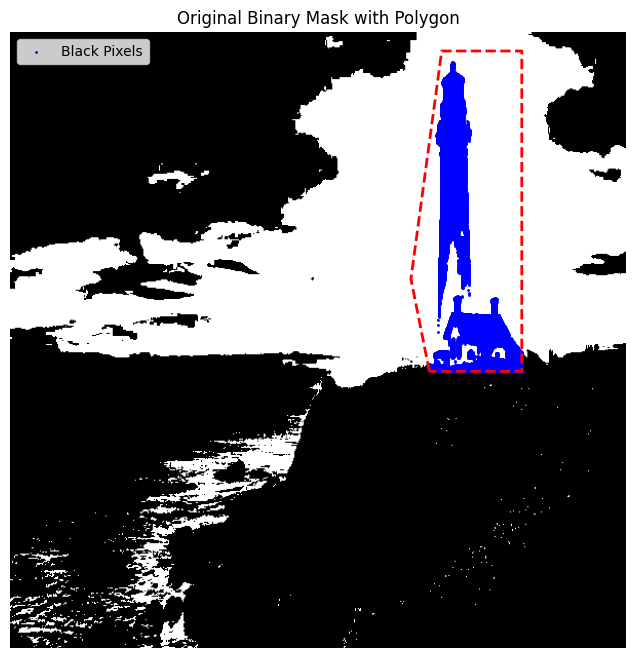

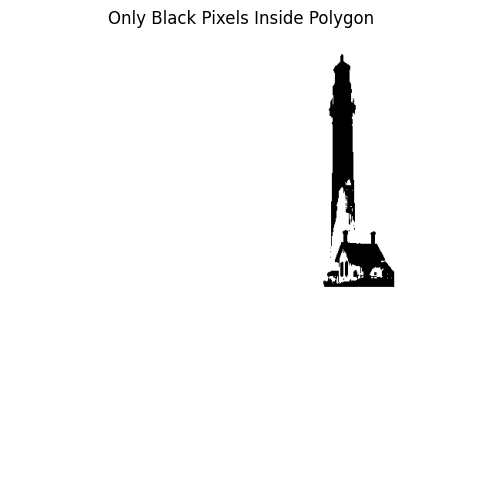

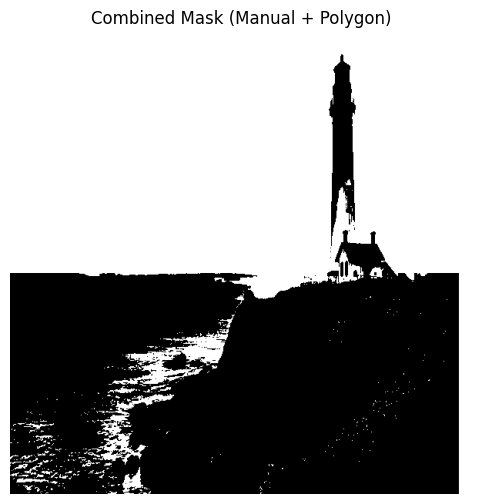

True

In [7]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

input_image_path = "/kaggle/input/dip-a1/lighthouse.png"
img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"Could not load image at {input_image_path}")

h, w = img.shape
yy, xx = np.indices((h, w))
x_norm = xx / w
y_norm = yy / h

mask_manual = np.zeros((h, w), dtype=np.uint8)
for i in range(h):
    for j in range(w):
        xn = x_norm[i, j]
        yn = y_norm[i, j]
        intensity = img[i, j]
        if yn <= 0.52:
            mask_manual[i, j] = 255
        else:
            if xn <= 0.97:
                if intensity > 145:
                    mask_manual[i, j] = 255
            else:
                mask_manual[i, j] = 255

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Manual Mask")
plt.imshow(mask_manual, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

binary_mask_path = "/kaggle/working/binary_mask.png"
binary_img = cv2.imread(binary_mask_path, cv2.IMREAD_GRAYSCALE)
if binary_img is None:
    raise FileNotFoundError(f"Could not load binary mask at {binary_mask_path}")

normalized_coords = [
    (0.68, 0.55), 
    (0.65, 0.4),
    (0.70, 0.03),  
    (0.83, 0.03),  
    (0.83, 0.55)
]

polygon_px = np.array([[int(x * w), int(y * h)] for x, y in normalized_coords], dtype=np.int32)
mask_polygon = np.zeros((h, w), dtype=np.uint8)
cv2.fillPoly(mask_polygon, [polygon_px], 255)

black_inside_polygon = np.where((mask_polygon == 255) & (binary_img == 0))
print(f"\nTotal black pixels inside polygon: {len(black_inside_polygon[0])}")

output_img = np.ones_like(binary_img) * 255
output_img[black_inside_polygon] = 0

plt.figure(figsize=(8, 8))
plt.imshow(binary_img, cmap='gray')
plt.title("Original Binary Mask with Polygon")
polygon = np.array(polygon_px)
plt.plot(*polygon[[*range(len(polygon)), 0]].T, 'r--', lw=2)
plt.scatter(black_inside_polygon[1], black_inside_polygon[0], s=1, color='blue', label='Black Pixels')
plt.axis('off')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(output_img, cmap='gray')
plt.title("Only Black Pixels Inside Polygon")
plt.axis('off')
plt.show()

cv2.imwrite("/kaggle/working/black_pixels_only.png", output_img)

combined_mask = np.minimum(mask_manual, output_img)

plt.figure(figsize=(6, 6))
plt.imshow(combined_mask, cmap='gray')
plt.title("Combined Mask (Manual + Polygon)")
plt.axis('off')
plt.show()

cv2.imwrite("/kaggle/working/combined_mask.png", combined_mask)


# 2

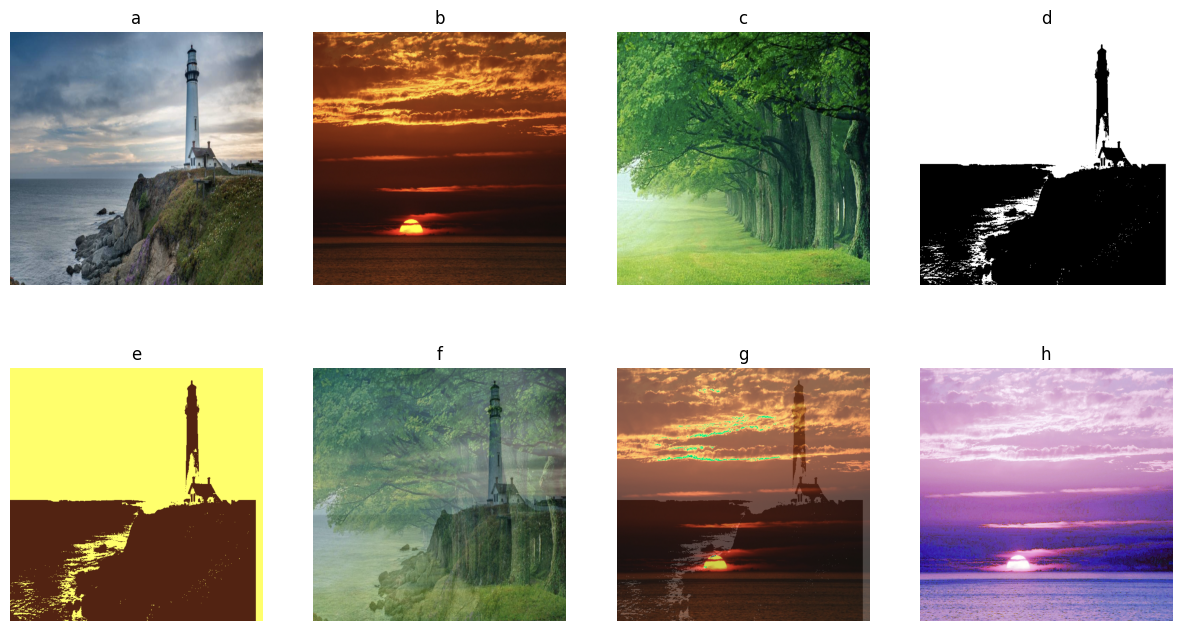

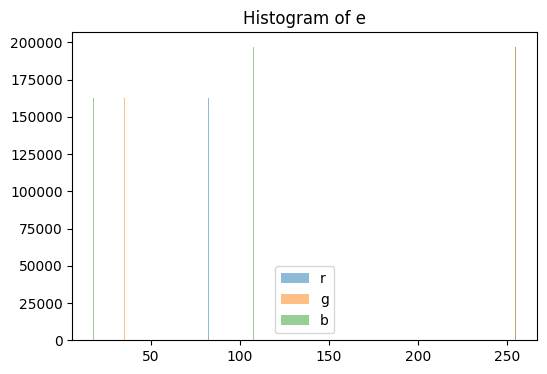

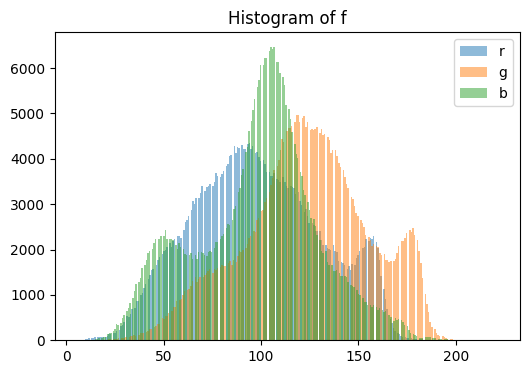

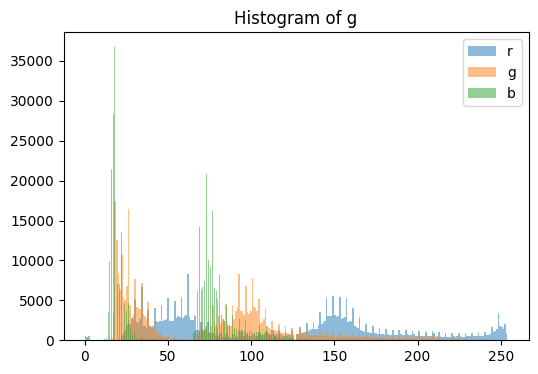

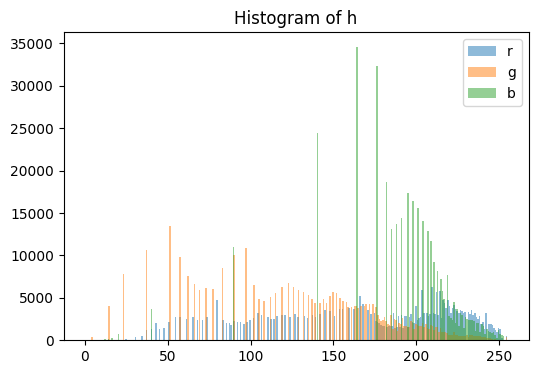

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

a = cv2.imread("/kaggle/input/dip-a1/lighthouse.png")
b = cv2.imread("/kaggle/input/dip-a1/sunset.png")
c = cv2.imread("/kaggle/input/dip-a1/trees.png")

a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)

combined_mask = cv2.imread("/kaggle/working/combined_mask.png")
combined_mask = cv2.cvtColor(combined_mask, cv2.COLOR_BGR2RGB)

def f(I1, I2, k1, k2, k3):
    return np.uint8(((I1 * k1) + (I2 * k2) + k3) % 255)

def g(I1, I2):
    return match_histograms(I1, I2, channel_axis=-1)

e = g(combined_mask, b)
f_out = f(a, c, 0.5, 0.5, 0)
g_out = f(b, combined_mask, 0.8, 0.2, 6)
h = g(b, 255 - c)

fig, axs = plt.subplots(2, 4, figsize=(15, 8))
imgs = [a, b, c, combined_mask, e, f_out, g_out, h]
titles = ["a", "b", "c", "d", "e", "f", "g", "h"]

for ax, img, title in zip(axs.ravel(), imgs, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")
plt.show()

outputs = [("e", e), ("f", f_out), ("g", g_out), ("h", h)]

for name, img in outputs:
    plt.figure(figsize=(6, 4))
    for i, col in enumerate(["r", "g", "b"]):
        plt.hist(img[:, :, i].ravel(), bins=256, alpha=0.5, label=col)
    plt.title(f"Histogram of {name}")
    plt.legend()
    plt.show()


# 3

# Algorithm: Histogram Matching from Scratch

1. **Input**
   - Source image `I1` (image to be modified).
   - Reference image `I2` (image to match histogram).

2. **Channel Separation**
   - If grayscale: use directly.
   - If color: split into channels (R, G, B) and process each channel independently.

3. **Compute Histogram of Source Image**
   - Initialize `H1[0..255] = 0`.
   - For every pixel value `p` in `I1`, increment `H1[p]`.

4. **Normalize Histogram of Source Image**
   - Divide each `H1[p]` by the total number of pixels in `I1`.

5. **Compute Cumulative Distribution Function (CDF) of Source**
   - `CDF1[0] = H1[0]`.
   - For each gray level `g` from 1 to 255:
     - `CDF1[g] = CDF1[g-1] + H1[g]`.

6. **Compute Histogram of Reference Image**
   - Initialize `H2[0..255] = 0`.
   - For every pixel value `q` in `I2`, increment `H2[q]`.

7. **Normalize Histogram of Reference Image**
   - Divide each `H2[q]` by the total number of pixels in `I2`.

8. **Compute CDF of Reference**
   - `CDF2[0] = H2[0]`.
   - For each gray level `g` from 1 to 255:
     - `CDF2[g] = CDF2[g-1] + H2[g]`.

9. **Construct Mapping Function**
   - For each gray level `g` in source:
     - Find the level `k` in reference such that `CDF2[k]` is closest to `CDF1[g]`.
     - Assign mapping: `Map[g] = k`.

10. **Apply Mapping**
    - For each pixel value `p` in `I1`:
      - Replace it with `Map[p]`.

11. **Reconstruct Output**
    - Merge modified channels (if color).

12. **Output**
    - Histogram-matched image `I_out`.
   
import numpy as np

def histogram_matching(source, reference):

    def match_single_channel(src_channel, ref_channel):
        # Flatten channels
        src_flat = src_channel.ravel()
        ref_flat = ref_channel.ravel()

        # 1. Compute histograms
        H_src = np.bincount(src_flat, minlength=256)
        H_ref = np.bincount(ref_flat, minlength=256)

        # 2. Normalize
        H_src = H_src / src_flat.size
        H_ref = H_ref / ref_flat.size

        # 3. Cumulative distribution functions
        CDF_src = np.cumsum(H_src)
        CDF_ref = np.cumsum(H_ref)

        # 4. Mapping function
        Map = np.zeros(256, dtype=np.uint8)
        for g in range(256):
            # Find closest match in reference CDF
            k = np.argmin(np.abs(CDF_ref - CDF_src[g]))
            Map[g] = k

        # 5. Apply mapping
        matched = Map[src_channel]
        return matched

    # If grayscale
    if source.ndim == 2:
        return match_single_channel(source, reference)
    
    # If color → process each channel separately
    matched_channels = []
    for ch in range(source.shape[2]):
        matched_channels.append(
            match_single_channel(source[..., ch], reference[..., ch])
        )
    return np.stack(matched_channels, axis=-1)


# 4

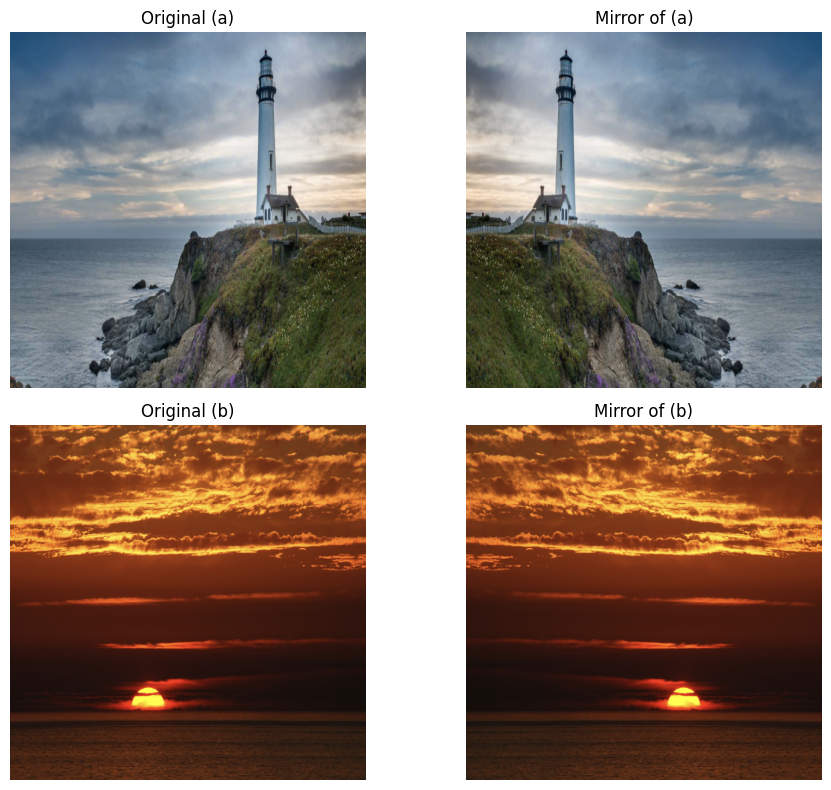

In [9]:
import cv2
import matplotlib.pyplot as plt

a = cv2.imread("/kaggle/input/dip-a1/lighthouse.png")
b = cv2.imread("/kaggle/input/dip-a1/sunset.png")

a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)

a_mirror = cv2.flip(a, 1)
b_mirror = cv2.flip(b, 1)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0,0].imshow(a); axs[0,0].set_title("Original (a)"); axs[0,0].axis("off")
axs[0,1].imshow(a_mirror); axs[0,1].set_title("Mirror of (a)"); axs[0,1].axis("off")
axs[1,0].imshow(b); axs[1,0].set_title("Original (b)"); axs[1,0].axis("off")
axs[1,1].imshow(b_mirror); axs[1,1].set_title("Mirror of (b)"); axs[1,1].axis("off")
plt.tight_layout()
plt.show()



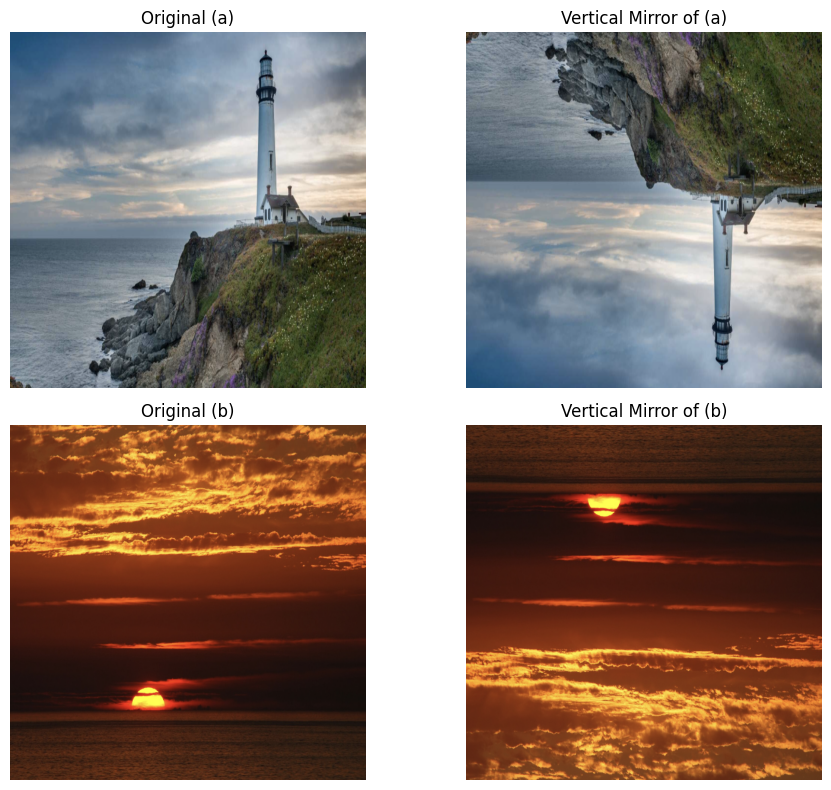

In [10]:
import cv2
import matplotlib.pyplot as plt

a = cv2.imread("/kaggle/input/dip-a1/lighthouse.png")
b = cv2.imread("/kaggle/input/dip-a1/sunset.png")

a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)

a_vmirror = cv2.flip(a, 0)
b_vmirror = cv2.flip(b, 0)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0,0].imshow(a); axs[0,0].set_title("Original (a)"); axs[0,0].axis("off")
axs[0,1].imshow(a_vmirror); axs[0,1].set_title("Vertical Mirror of (a)"); axs[0,1].axis("off")
axs[1,0].imshow(b); axs[1,0].set_title("Original (b)"); axs[1,0].axis("off")
axs[1,1].imshow(b_vmirror); axs[1,1].set_title("Vertical Mirror of (b)"); axs[1,1].axis("off")
plt.tight_layout()
plt.show()


# Section C

# A

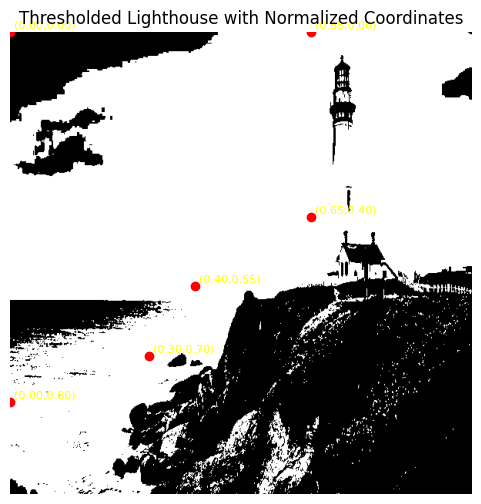

True

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

lighthouse = cv2.imread("/kaggle/input/dip-a1/lighthouse.png", cv2.IMREAD_GRAYSCALE)

_, thresh = cv2.threshold(lighthouse, 100, 255, cv2.THRESH_BINARY)

h, w = thresh.shape

normalized_coords = [
    (0, 0),
    (0.0, 0.8),
    (0.3, 0.7),  
    (0.4, 0.55), 
    (0.65, 0.4),
    (0.65, 0.0),
]

pixel_coords = [(int(x * w), int(y * h)) for x, y in normalized_coords]

plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap="gray")
plt.title("Thresholded Lighthouse with Normalized Coordinates")
plt.axis("off")

for (x, y), (xn, yn) in zip(pixel_coords, normalized_coords):
    plt.plot(x, y, "ro", markersize=6)
    plt.text(x+5, y-5, f"({xn:.2f},{yn:.2f})", color="yellow", fontsize=8)

plt.show()

cv2.imwrite("/kaggle/working/thresholded_lighthouse.png", thresh)


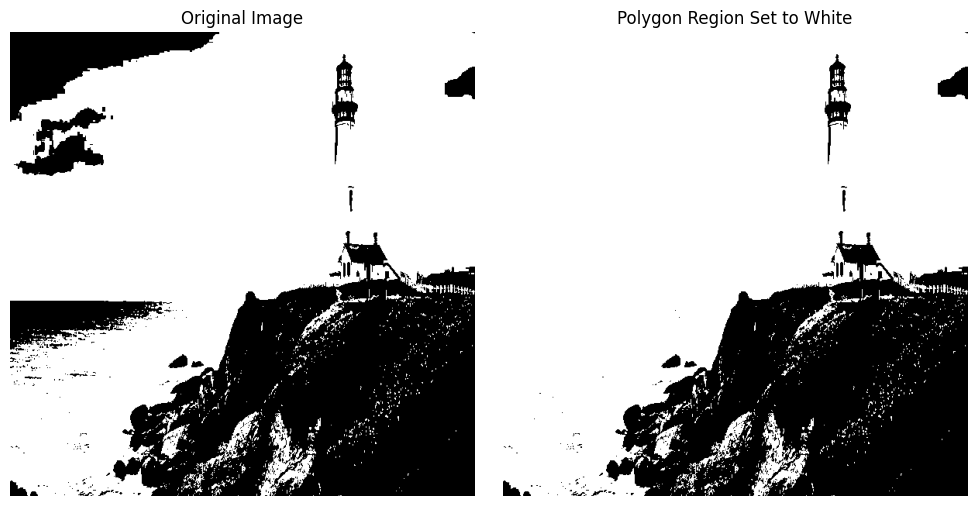

True

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/kaggle/working/thresholded_lighthouse.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found")
h, w = img.shape

normalized_coords = [
    (0, 0),
    (0.0, 0.8),
    (0.3, 0.7),  
    (0.4, 0.55), 
    (0.65, 0.4),
    (0.65, 0.0),
]

polygon_px = np.array([[int(x * w), int(y * h)] for x, y in normalized_coords], dtype=np.int32)

polygon_mask = np.zeros((h, w), dtype=np.uint8)
cv2.fillPoly(polygon_mask, [polygon_px], 255)

output = img.copy()
output[polygon_mask == 255] = 255

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title("Polygon Region Set to White")
plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite("/kaggle/working/thresholded_lighthouse_polygon_filled.png", output)


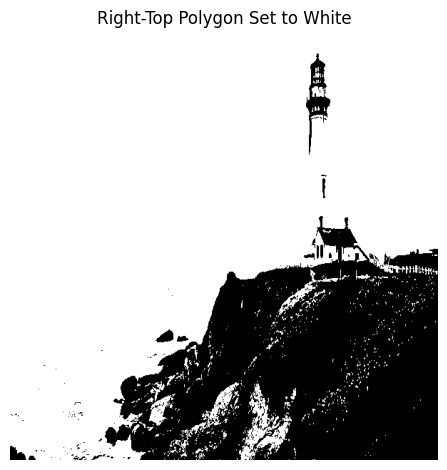

True

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/kaggle/working/thresholded_lighthouse_polygon_filled.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found")

h, w = img.shape

normalized_coords = [
    (1, 0),
    (1, 0.3),  
    (0.8, 0.3),
    (0.8, 0)
]

polygon_px = np.array([[int(x * w), int(y * h)] for x, y in normalized_coords], dtype=np.int32)

polygon_mask = np.zeros((h, w), dtype=np.uint8)
cv2.fillPoly(polygon_mask, [polygon_px], 255)

output = img.copy()

output[polygon_mask == 255] = 255


plt.imshow(output, cmap='gray')
plt.title("Right-Top Polygon Set to White")
plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite("/kaggle/working/lighthouse_polygon_topright_filled.png", output)


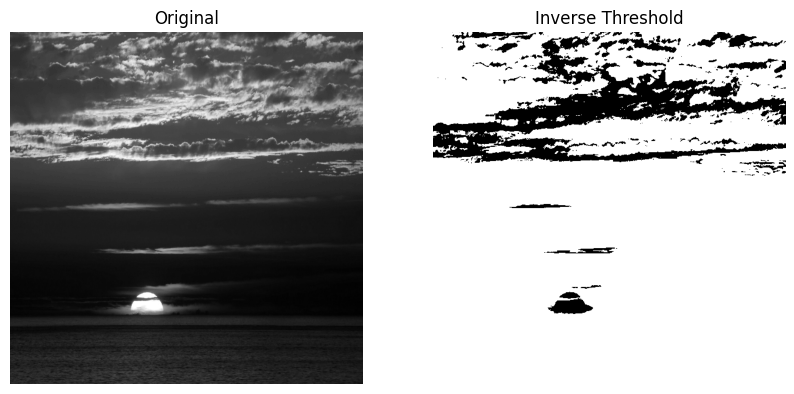

In [14]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/kaggle/input/dip-a1/sunset.png', cv2.IMREAD_GRAYSCALE)

thresh_value = 110
max_value = 255
_, img_inv_thresh = cv2.threshold(img, thresh_value, max_value, cv2.THRESH_BINARY_INV)
cv2.imwrite('inverse_thresholded.jpg', img_inv_thresh)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Inverse Threshold')
plt.imshow(img_inv_thresh, cmap='gray')
plt.axis('off')

plt.show()


# B


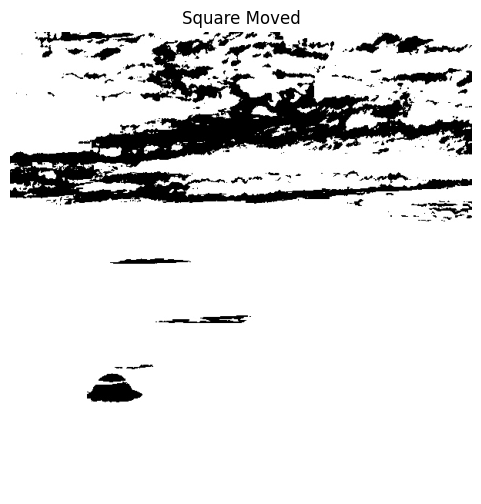

True

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('inverse_thresholded.jpg', cv2.IMREAD_GRAYSCALE)
img_copy = img.copy()

x1, y1 = 200, 400  
x2, y2 = 300, 500  

square = img[y1:y2, x1:x2].copy()

new_x1, new_y1 = 100, 400
new_x2, new_y2 = new_x1 + (x2 - x1), new_y1 + (y2 - y1)

img_copy[new_y1:new_y2, new_x1:new_x2] = square

img_copy[y1:y2, x1:x2] = 255 
plt.figure(figsize=(6,6))
plt.imshow(img_copy, cmap='gray')
plt.title('Square Moved')
plt.axis('off')
plt.show()

cv2.imwrite('moved_square.jpg', img_copy)


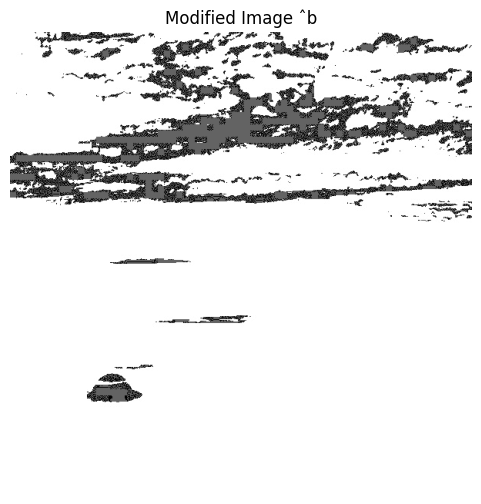

In [16]:
import cv2
import matplotlib.pyplot as plt

img_moved = cv2.imread('moved_square.jpg', cv2.IMREAD_GRAYSCALE)

img_hat = img_moved.copy()
img_hat[img_hat == 0] = 100 

cv2.imwrite('hat_b.jpg', img_hat)


plt.figure(figsize=(6,6))
plt.imshow(img_hat, cmap='gray')
plt.title('Modified Image ˆb')
plt.axis('off')
plt.show()


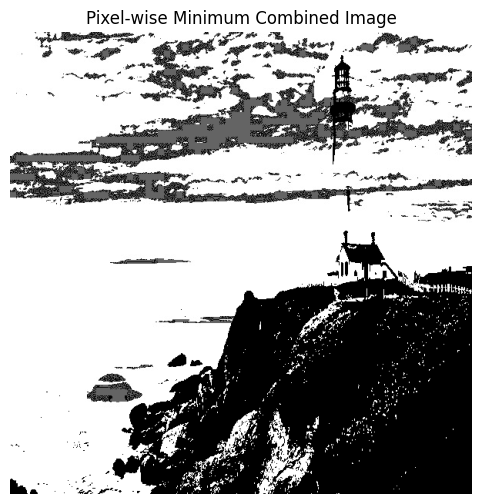

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('hat_b.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/kaggle/working/lighthouse_polygon_topright_filled.png', cv2.IMREAD_GRAYSCALE)

if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

combined = np.minimum(img1, img2)

# Save the result
cv2.imwrite('combined_min.jpg', combined)

# Plot the combined image
plt.figure(figsize=(6,6))
plt.imshow(combined, cmap='gray')
plt.title('Pixel-wise Minimum Combined Image')
plt.axis('off')
plt.show()


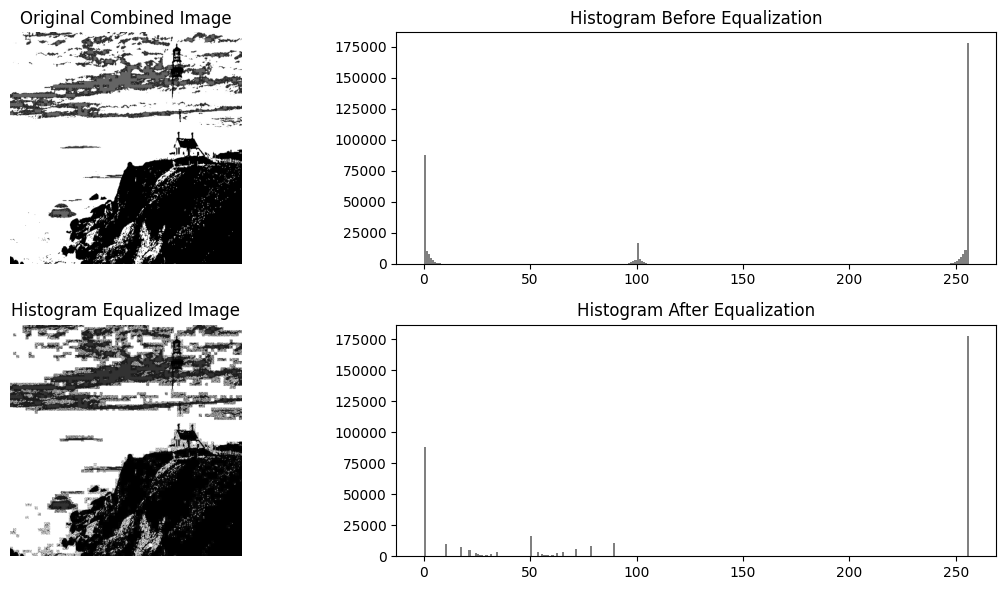

True

In [18]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('combined_min.jpg', cv2.IMREAD_GRAYSCALE)

img_eq = cv2.equalizeHist(img)

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Combined Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.hist(img.ravel(), bins=256, range=[0,256], color='gray')
plt.title('Histogram Before Equalization')

plt.subplot(2,2,3)
plt.imshow(img_eq, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.subplot(2,2,4)
plt.hist(img_eq.ravel(), bins=256, range=[0,256], color='gray')
plt.title('Histogram After Equalization')

plt.tight_layout()
plt.show()

cv2.imwrite('combined_min_equalized.jpg', img_eq)


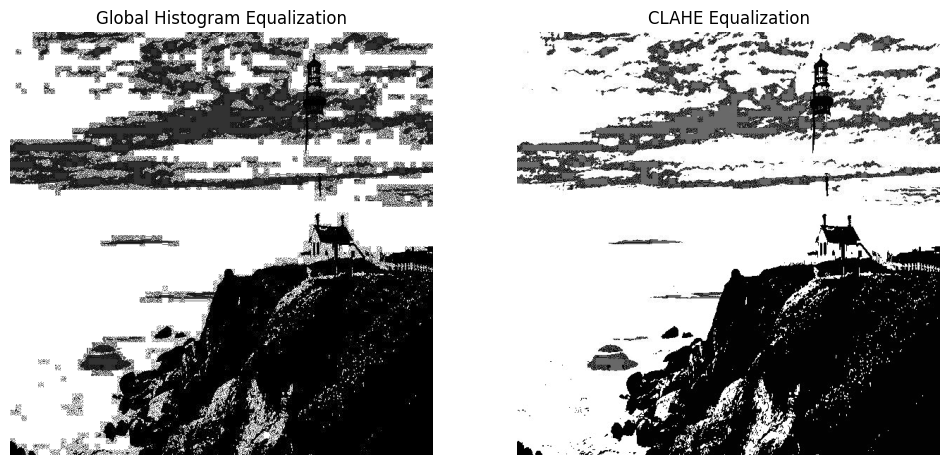

True

In [19]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_eq, cmap='gray')
plt.title('Global Histogram Equalization')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_clahe, cmap='gray')
plt.title('CLAHE Equalization')
plt.axis('off')

plt.show()

cv2.imwrite('combined_min_clahe.jpg', img_clahe)


## Histogram Equalization Observations

1. **Original Combined Image**
   - The pixel intensity values are concentrated in the lower range (darker tones), indicating that the image is overall dark.
   - Histogram shows a peak in the dark region (0-100) and very few bright pixels.

2. **Global Histogram Equalization**
   - Spreads the pixel intensities across the full range (0-255), increasing the overall contrast.
   - Dark areas become brighter, but some regions may appear over-enhanced or washed out.
   - Histogram becomes more uniform, but global equalization does not consider local variations in brightness.

3. **CLAHE (Contrast Limited Adaptive Histogram Equalization)**
   - Applies histogram equalization **locally** on small tiles, preserving local contrast.
   - Prevents over-amplification of noise in uniform regions.
   - Enhances details in both dark and bright areas simultaneously.
   - Histogram is spread locally, giving a more balanced contrast while avoiding extreme pixel intensities.

### Why CLAHE is better
- **Local contrast preservation:** Unlike global histogram equalization, CLAHE improves contrast in small regions without affecting the whole image uniformly.
- **Prevents over-brightening:** Limits extreme intensity changes (via clipLimit), avoiding washed-out areas.
- **Better for uneven illumination:** Ideal for combined or multi-region images like `combined_min.jpg`, where different areas have different lighting.

**Conclusion:**  
For images with uneven lighting or combined dark and bright regions, CLAHE provides more visually pleasing contrast enhancement than global histogram equalization.


Resources Used
1) Perplexity AI (https://www.perplexity.ai/search/a-high-definition-television-h-wrFaAzIBQqeAS4747p9WDw)
2) Gemini (https://g.co/gemini/share/8096d1b82a3e)
3) Gonalez and Woods